# importing essentials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

unemply=pd.read_csv('unemployment1.csv')
print(unemply.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

# data preprocessing

In [2]:
unemply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1   Date                                      267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [3]:
unemply.columns

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [4]:
unemply.describe()


Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44.055000   27.278400   85.279900  
max                                   69.690000   33.778200   92.937600

In [5]:
unemply.value_counts()

Region           Date          Frequency   Estimated Unemployment Rate (%)   Estimated Employed   Estimated Labour Participation Rate (%)  Region.1  longitude  latitude
Andhra Pradesh    29-02-2020   M          5.83                              16545652             40.90                                     South     15.9129    79.7400     1
Punjab            31-01-2020   M          11.11                             9442093              42.82                                     North     31.1471    75.3412     1
Puducherry        29-02-2020   M          1.76                              493961               40.80                                     South     11.9416    79.8083     1
                  30-04-2020   M          75.85                             117542               39.30                                     South     11.9416    79.8083     1
                  30-06-2020   M          4.24                              367135               30.80                                 

<AxesSubplot:xlabel=' Estimated Unemployment Rate (%)', ylabel=' Estimated Labour Participation Rate (%)'>

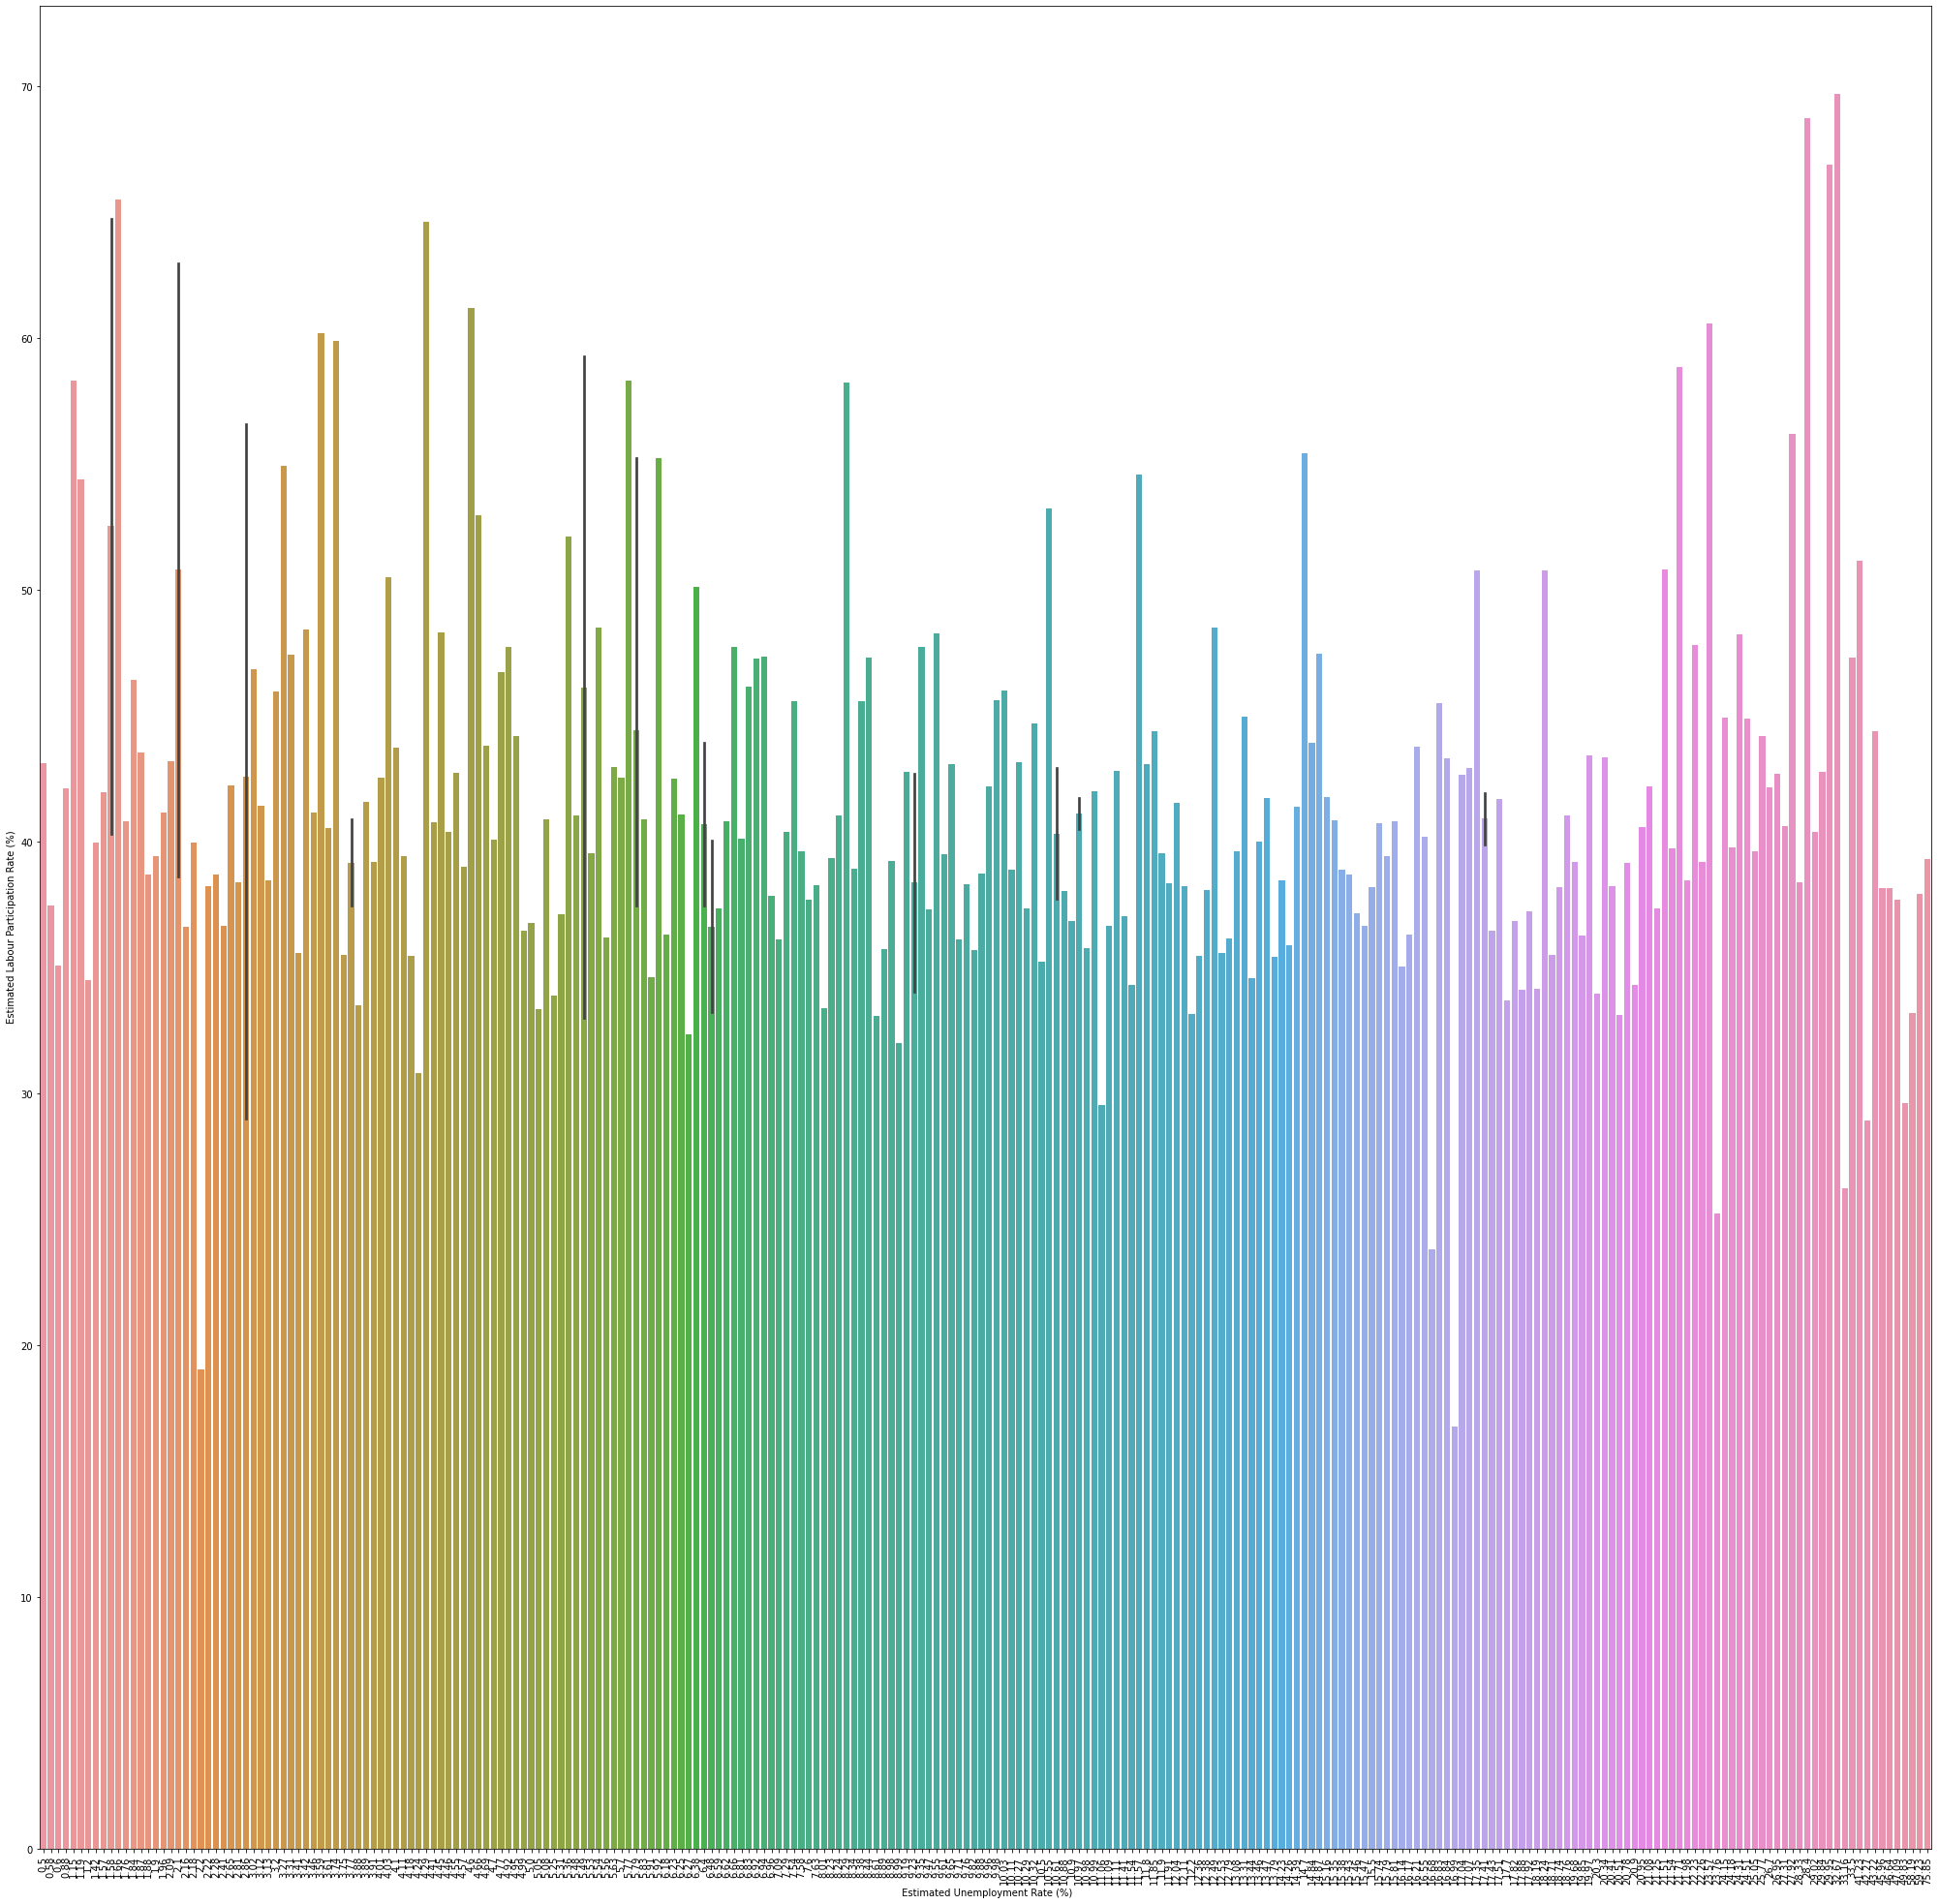

In [6]:
import seaborn as sns
plt.figure(figsize=(35,35))
plt.xticks(rotation=90)
sns.barplot(x=unemply[" Estimated Unemployment Rate (%)"],y=unemply[" Estimated Labour Participation Rate (%)"])


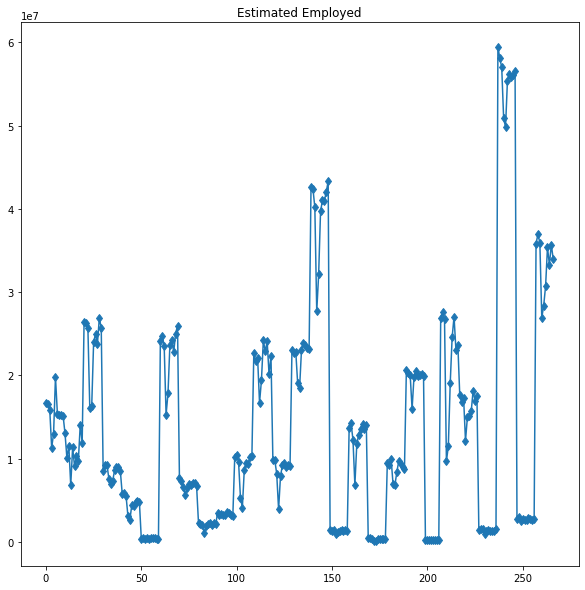

In [7]:
plt.figure(figsize=(10,10))
plt.title("Estimated Employed")
plt.plot(unemply[" Estimated Employed"],markevery=1,marker='d')
plt.show()

In [8]:
x=["latitude","longitude","Region.1"," Frequency"," Estimated Employed"]
unemply.drop(x,axis=1,inplace=True)

In [9]:
unemply.head()

Region         Date   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020                              5.48   
1  Andhra Pradesh   29-02-2020                              5.83   
2  Andhra Pradesh   31-03-2020                              5.79   
3  Andhra Pradesh   30-04-2020                             20.51   
4  Andhra Pradesh   31-05-2020                             17.43   

    Estimated Labour Participation Rate (%)  
0                                     41.02  
1                                     40.90  
2                                     39.18  
3                                     33.10  
4                                     36.46

In [10]:
X_un=unemply.iloc[:,[0,1,3]]

In [11]:
X_lb=unemply.iloc[:,[0,1,2]]

In [12]:
print(X_lb)

             Region         Date   Estimated Unemployment Rate (%)
0    Andhra Pradesh   31-01-2020                              5.48
1    Andhra Pradesh   29-02-2020                              5.83
2    Andhra Pradesh   31-03-2020                              5.79
3    Andhra Pradesh   30-04-2020                             20.51
4    Andhra Pradesh   31-05-2020                             17.43
..              ...          ...                               ...
262     West Bengal   30-06-2020                              7.29
263     West Bengal   31-07-2020                              6.83
264     West Bengal   31-08-2020                             14.87
265     West Bengal   30-09-2020                              9.35
266     West Bengal   31-10-2020                              9.98

[267 rows x 3 columns]


In [13]:
print(X_un)

             Region         Date   Estimated Labour Participation Rate (%)
0    Andhra Pradesh   31-01-2020                                     41.02
1    Andhra Pradesh   29-02-2020                                     40.90
2    Andhra Pradesh   31-03-2020                                     39.18
3    Andhra Pradesh   30-04-2020                                     33.10
4    Andhra Pradesh   31-05-2020                                     36.46
..              ...          ...                                       ...
262     West Bengal   30-06-2020                                     40.39
263     West Bengal   31-07-2020                                     46.17
264     West Bengal   31-08-2020                                     47.48
265     West Bengal   30-09-2020                                     47.73
266     West Bengal   31-10-2020                                     45.63

[267 rows x 3 columns]


In [14]:
y_un=unemply.iloc[:,[2]]

In [15]:
y_lb=unemply.iloc[:,[3]]

In [16]:
print(y_un)

      Estimated Unemployment Rate (%)
0                                5.48
1                                5.83
2                                5.79
3                               20.51
4                               17.43
..                                ...
262                              7.29
263                              6.83
264                             14.87
265                              9.35
266                              9.98

[267 rows x 1 columns]


In [17]:
print(y_lb)

      Estimated Labour Participation Rate (%)
0                                       41.02
1                                       40.90
2                                       39.18
3                                       33.10
4                                       36.46
..                                        ...
262                                     40.39
263                                     46.17
264                                     47.48
265                                     47.73
266                                     45.63

[267 rows x 1 columns]


# Encoding the data

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,1])], remainder='passthrough')
X_lb = np.array(ct.fit_transform(X_lb))
X_un = np.array(ct.fit_transform(X_un))

In [19]:
print(X_lb)

[[ 1.    0.    0.   ...  0.    0.    5.48]
 [ 1.    0.    0.   ...  0.    0.    5.83]
 [ 1.    0.    0.   ...  0.    0.    5.79]
 ...
 [ 0.    0.    0.   ...  1.    0.   14.87]
 [ 0.    0.    0.   ...  0.    0.    9.35]
 [ 0.    0.    0.   ...  0.    1.    9.98]]


In [20]:
print(X_un)

[[ 1.    0.    0.   ...  0.    0.   41.02]
 [ 1.    0.    0.   ...  0.    0.   40.9 ]
 [ 1.    0.    0.   ...  0.    0.   39.18]
 ...
 [ 0.    0.    0.   ...  1.    0.   47.48]
 [ 0.    0.    0.   ...  0.    0.   47.73]
 [ 0.    0.    0.   ...  0.    1.   45.63]]


# Splitting the dataset

In [21]:
from sklearn.model_selection import train_test_split
X_lb_train, X_lb_test,X_un_train, X_un_test, y_lb_train, y_lb_test,y_un_train, y_un_test = train_test_split(X_lb,X_un, y_lb,y_un, test_size = 0.2, random_state = 1)

In [22]:
print(X_lb_train)

[[ 0.    0.    0.   ...  1.    0.   14.87]
 [ 0.    0.    0.   ...  0.    0.   11.11]
 [ 0.    0.    0.   ...  0.    0.    5.31]
 ...
 [ 0.    0.    0.   ...  0.    0.   25.05]
 [ 0.    0.    0.   ...  0.    0.   17.35]
 [ 0.    0.    0.   ...  1.    0.    5.63]]


In [23]:
print(X_un_train)

[[ 0.    0.    0.   ...  1.    0.   47.48]
 [ 0.    0.    0.   ...  0.    0.   42.82]
 [ 0.    0.    0.   ...  0.    0.   37.12]
 ...
 [ 0.    0.    0.   ...  0.    0.   39.63]
 [ 0.    0.    0.   ...  0.    0.   50.77]
 [ 0.    0.    0.   ...  1.    0.   42.97]]


In [24]:
print(y_lb_train)

      Estimated Labour Participation Rate (%)
264                                     47.48
179                                     42.82
119                                     37.12
181                                     44.69
19                                      46.84
..                                        ...
203                                     48.32
255                                     39.18
72                                      39.63
235                                     50.77
37                                      42.97

[213 rows x 1 columns]


In [25]:
print(y_un_train)

      Estimated Unemployment Rate (%)
264                             14.87
179                             11.11
119                              5.31
181                             10.32
19                               3.02
..                                ...
203                              4.45
255                             22.26
72                              25.05
235                             17.35
37                               5.63

[213 rows x 1 columns]


In [26]:
print(X_lb_test)

[[ 0.    1.    0.   ...  0.    0.    4.77]
 [ 0.    0.    0.   ...  0.    0.    1.96]
 [ 0.    0.    0.   ...  1.    0.    0.5 ]
 ...
 [ 0.    0.    0.   ...  0.    0.   21.08]
 [ 0.    0.    0.   ...  0.    0.    8.38]
 [ 0.    1.    0.   ...  0.    0.    1.19]]


In [27]:
print(X_un_test)

[[ 0.    1.    0.   ...  0.    0.   46.73]
 [ 0.    0.    0.   ...  0.    0.   41.14]
 [ 0.    0.    0.   ...  1.    0.   43.13]
 ...
 [ 0.    0.    0.   ...  0.    0.   42.2 ]
 [ 0.    0.    0.   ...  0.    0.   45.58]
 [ 0.    1.    0.   ...  0.    0.   54.38]]


In [28]:
print(y_lb_test)

      Estimated Labour Participation Rate (%)
12                                      46.73
38                                      41.14
116                                     43.13
78                                      39.20
51                                      38.38
62                                      47.75
44                                      28.91
187                                     39.50
262                                     40.39
167                                     38.63
134                                     40.04
229                                     66.89
73                                      44.38
161                                     39.62
172                                     39.30
246                                     35.49
117                                     36.66
244                                     35.96
185                                     42.76
266                                     45.63
4                                 

In [29]:
print(y_un_test)

      Estimated Unemployment Rate (%)
12                               4.77
38                               1.96
116                              0.50
78                              19.68
51                               2.81
62                               6.66
44                              42.27
187                              9.61
262                              7.29
167                              2.10
134                              6.48
229                             29.95
73                              43.22
161                             13.08
172                             75.85
246                              3.75
117                              2.41
244                              5.79
185                              9.19
266                              9.98
4                               17.43
180                             10.97
154                              1.15
138                              3.13
140                              4.69
204         

# DECISION TREE

In [30]:
#read from data
import pandas as pd
binary = pd.read_csv('unemployment1.csv')
binary.head()


Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [31]:
# Describe a data frame in Python - summary statistics of all the variables
binary.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.112400   76.085600  
50%                                   40.390000   23.610200   79.019300  
75%                                   44.055000   27.278400   85.279900  
max                                   69.690000   33.778200   92.937600

In [32]:
# Columns
binary.dtypes.index

Index(['Region', 'Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_lb_train[:, -1:] = sc.fit_transform(X_lb_train[:, -1:])
X_lb_test[:, -1:] = sc.transform(X_lb_test[:, -1:])
X_un_train[:, -1:] = sc.fit_transform(X_un_train[:, -1:])
X_un_test[:, -1:] = sc.transform(X_un_test[:, -1:])

In [34]:
print(X_lb_train)

[[ 0.          0.          0.         ...  1.          0.
   0.25548985]
 [ 0.          0.          0.         ...  0.          0.
  -0.11330187]
 [ 0.          0.          0.         ...  0.          0.
  -0.68218272]
 ...
 [ 0.          0.          0.         ...  0.          0.
   1.25397382]
 [ 0.          0.          0.         ...  0.          0.
   0.49873546]
 [ 0.          0.          0.         ...  1.          0.
  -0.65079619]]


In [35]:
print(X_un_train)

[[ 0.          0.          0.         ...  1.          0.
   0.7331979 ]
 [ 0.          0.          0.         ...  0.          0.
   0.1506936 ]
 [ 0.          0.          0.         ...  0.          0.
  -0.56181166]
 ...
 [ 0.          0.          0.         ...  0.          0.
  -0.24805934]
 [ 0.          0.          0.         ...  0.          0.
   1.14445093]
 [ 0.          0.          0.         ...  1.          0.
   0.16944374]]


In [36]:
print(X_lb_test)

[[ 0.          1.          0.         ...  0.          0.
  -0.73514749]
 [ 0.          0.          0.         ...  0.          0.
  -1.01076045]
 [ 0.          0.          0.         ...  1.          0.
  -1.1539615 ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.86458469]
 [ 0.          0.          0.         ...  0.          0.
  -0.3810682 ]
 [ 0.          1.          0.         ...  0.          0.
  -1.08628429]]


In [37]:
print(X_un_test)

[[ 0.          1.          0.         ...  0.          0.
   0.63944721]
 [ 0.          0.          0.         ...  0.          0.
  -0.05930795]
 [ 0.          0.          0.         ...  1.          0.
   0.18944389]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.07319303]
 [ 0.          0.          0.         ...  0.          0.
   0.49569615]
 [ 0.          1.          0.         ...  0.          0.
   1.59570426]]


In [38]:
# Split sample into Train and Test
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(binary, test_size = 0.3, random_state = 176)

# Print a few rows
Train.head()


Region         Date  Frequency   Estimated Unemployment Rate (%)  \
55              Goa   30-06-2020          M                              9.96   
12            Assam   31-03-2020          M                              4.77   
195       Rajasthan   31-07-2020          M                             15.81   
199          Sikkim   31-03-2020          M                             23.57   
129  Madhya Pradesh   31-01-2020          M                              4.11   

      Estimated Employed   Estimated Labour Participation Rate (%)   Region.1  \
55                489111                                     42.21       West   
12              11542888                                     46.73  Northeast   
195             19932393                                     40.80      North   
199               262895                                     60.59  Northeast   
129             23018632                                     39.42       West   

     longitude  latitude  
55     15.2993   74.1240  
12     26.2006   92.9376  
195    27.0238   74.2179  
199    27.5330   88.5122  
129    22.9734   78.6569

In [39]:
# Keep Target and Independent Variable into different array
Train_IndepentVars = Train.values[:, 3:5]
Train_TargetVar = Train.values[:,5]

In [40]:
Train_IndepentVars[:10]


array([[9.96, 489111],
       [4.77, 11542888],
       [15.81, 19932393],
       [23.57, 262895],
       [4.11, 23018632],
       [4.92, 36964178],
       [19.68, 7132439],
       [15.5, 3359107],
       [8.98, 58060531],
       [5.92, 1215064]], dtype=object)

In [41]:
Train_TargetVar[:20]

array([42.21, 46.73, 40.8, 60.59, 39.42, 47.74, 39.2, 38.18, 39.23, 55.24,
       39.63, 39.2, 36.11, 35.49, 42.14, 42.82, 40.6, 39.18, 40.39, 38.24],
      dtype=object)

In [42]:
print ("Total rows = ", len(Train_TargetVar))
print ("Total A-rows = ", (Train_TargetVar == 'A').sum())
print ("Total B-rows = ", (Train_TargetVar == 'B').sum())

Total rows =  186
Total A-rows =  0
Total B-rows =  0


# Applying model(Multiple linear regression) for labour rate

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_lb_train, y_lb_train)

LinearRegression()

# Predictions for labour rate

In [44]:
y_lb_pred = regressor.predict(X_lb_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_lb_pred.reshape(len(y_lb_pred),1), y_lb_test.values.reshape(len(y_lb_test),1)),1))

[[44.04 46.73]
 [41.75 41.14]
 [42.06 43.13]
 [41.18 39.2 ]
 [42.17 38.38]
 [46.87 47.75]
 [36.41 28.91]
 [40.58 39.5 ]
 [45.34 40.39]
 [37.62 38.63]
 [38.97 40.04]
 [59.1  66.89]
 [34.58 44.38]
 [39.58 39.62]
 [34.25 39.3 ]
 [38.31 35.49]
 [41.89 36.66]
 [39.5  35.96]
 [40.66 42.76]
 [45.78 45.63]
 [36.94 36.46]
 [43.41 41.72]
 [59.84 58.31]
 [38.67 38.47]
 [44.32 43.8 ]
 [46.05 48.49]
 [37.18 37.45]
 [41.06 43.75]
 [35.77 42.78]
 [46.05 40.77]
 [40.3  41.38]
 [38.82 35.23]
 [41.79 40.82]
 [42.9  42.92]
 [37.98 34.59]
 [38.89 35.45]
 [43.15 44.88]
 [33.02 38.21]
 [34.25 30.8 ]
 [41.07 38.89]
 [56.25 52.1 ]
 [40.44 41.54]
 [36.17 38.03]
 [38.91 37.29]
 [35.37 33.06]
 [31.84 33.71]
 [47.61 60.59]
 [46.24 47.73]
 [55.85 54.94]
 [40.59 38.31]
 [37.1  39.98]
 [39.91 42.2 ]
 [45.2  45.58]
 [43.   54.38]]


# Checking accuracy

In [45]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_lb_test,y_lb_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 67.81


# Visualizing overall(unemployed/labor)

Text(0, 0.5, 'Predicted Labor')

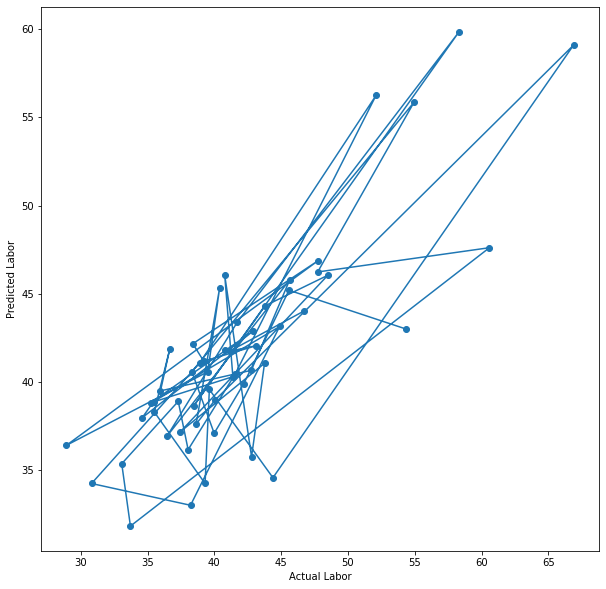

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(y_lb_test,y_lb_pred)
plt.plot(y_lb_test,y_lb_pred)
plt.xlabel('Actual Labor')
plt.ylabel('Predicted Labor')

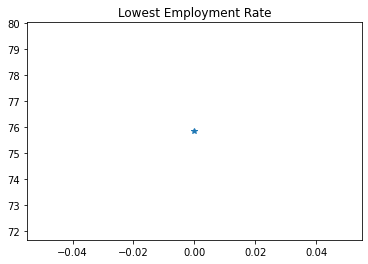

In [47]:

d=(max(unemply[' Estimated Unemployment Rate (%)']))
plt.title("Lowest Employment Rate")
plt.plot(d,markevery=1,marker='*')

State with highest unemployment rate(from where people migrate) #Bihar

# Applying model(Multiple linear regression) for Unemployment rate

In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_un_train, y_un_train)

LinearRegression()

# Predictions for Unemployment  rate

In [49]:
y_un_pred = regressor.predict(X_un_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_un_pred.reshape(len(y_un_pred),1), y_un_test.values.reshape(len(y_un_test),1)),1))

[[ 2.6   4.77]
 [ 5.17  1.96]
 [ 5.98  0.5 ]
 [22.94 19.68]
 [ 7.1   2.81]
 [ 3.65  6.66]
 [25.77 42.27]
 [ 8.29  9.61]
 [ 7.17  7.29]
 [ 2.95  2.1 ]
 [ 7.09  6.48]
 [25.18 29.95]
 [39.75 43.22]
 [ 3.18 13.08]
 [26.48 75.85]
 [ 5.48  3.75]
 [ 1.39  2.41]
 [ 8.15  5.79]
 [10.77  9.19]
 [ 5.81  9.98]
 [19.9  17.43]
 [ 8.07 10.97]
 [ 3.09  1.15]
 [ 2.7   3.13]
 [ 4.68  4.69]
 [ 4.42 12.49]
 [ 5.37  3.77]
 [ 5.11  4.1 ]
 [18.62 29.84]
 [-1.06  4.41]
 [16.92 14.39]
 [17.86 10.5 ]
 [ 4.27  6.62]
 [18.02 10.61]
 [17.18 13.44]
 [ 6.22  4.18]
 [16.43 24.51]
 [31.68 18.74]
 [11.13  4.24]
 [ 8.54 15.38]
 [ 3.14  5.36]
 [13.57 12.04]
 [17.3  10.88]
 [ 9.98  9.47]
 [10.04  8.61]
 [25.06 17.7 ]
 [ 7.9  23.57]
 [ 7.51  9.35]
 [ 3.39  3.27]
 [18.76  9.76]
 [ 2.8   2.18]
 [17.04 21.08]
 [ 5.94  8.38]
 [ 6.23  1.19]]


# Accuracy for unemployment rate

In [50]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_un_test,y_un_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 53.39


# Visualization for unemployment

Text(0, 0.5, 'Predicted Unemployed')

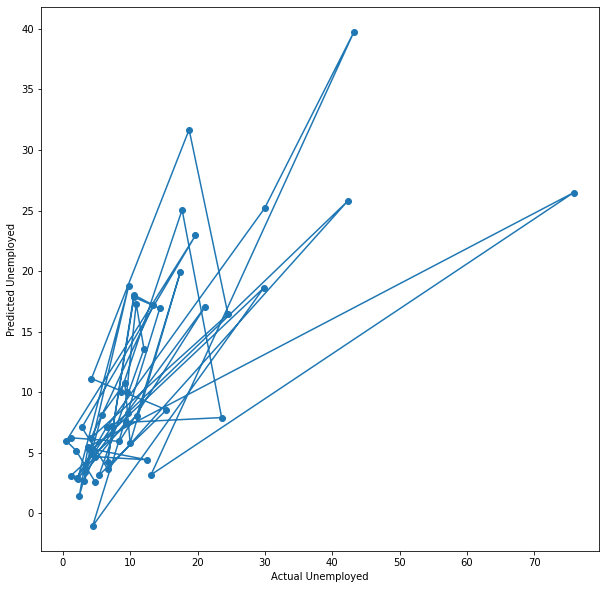

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(y_un_test,y_un_pred)
plt.plot(y_un_test,y_un_pred)
plt.xlabel('Actual Unemployed')
plt.ylabel('Predicted Unemployed')

Using the above model we can say that the most people who migrate in search of work and stay unemployed or do most of the labor work are from Bihar

In [52]:
data = pd.read_csv('unemployment1.csv')
print(data.head())
print(unemply.isnull().sum())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')


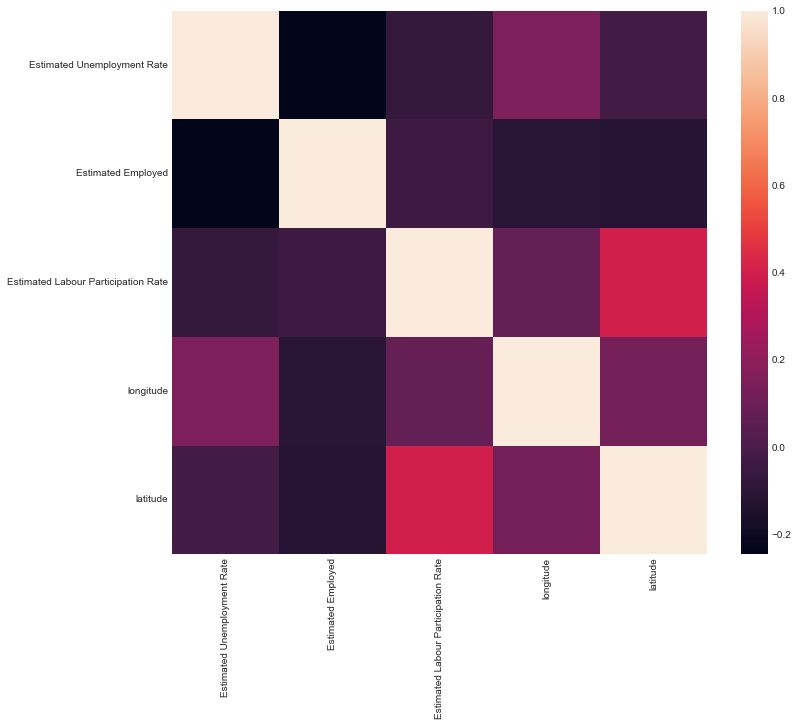

In [53]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]
print (data.columns)
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

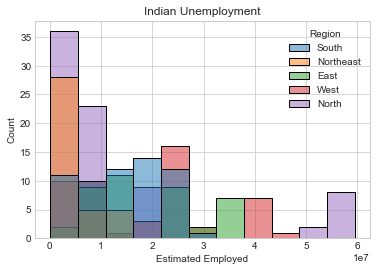

In [54]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

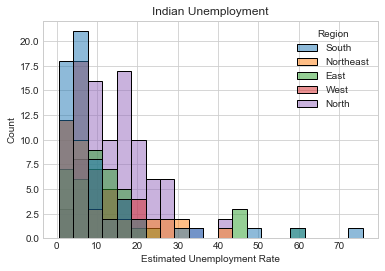

In [55]:
data.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

In [56]:

unemployment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

In [57]:
#K MEANS IMPLEMENTATION

X =  [[ 3.61 -2.09 -1.05]
 [ 3.   -2.6  -1.57]
 [-4.13 -0.85  1.8 ]
 ...
 [ 3.37 -3.5  -3.48]
 [ 1.63 -2.64 -4.3 ]
 [-4.97 -0.59  3.64]] (800, 3)
y =  [1 1 3 1 1 1 3 1 0 1 0 2 1 2 1 1 0 0 2 3 0 1 3 0 0 2 1 0 3 1 1 3 1 1 1 1 0
 0 3 3 3 2 1 0 0 1 3 0 1 3] 800


C:\Users\NEHATH~1\AppData\Local\Temp/ipykernel_4708/1079446832.py:16: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



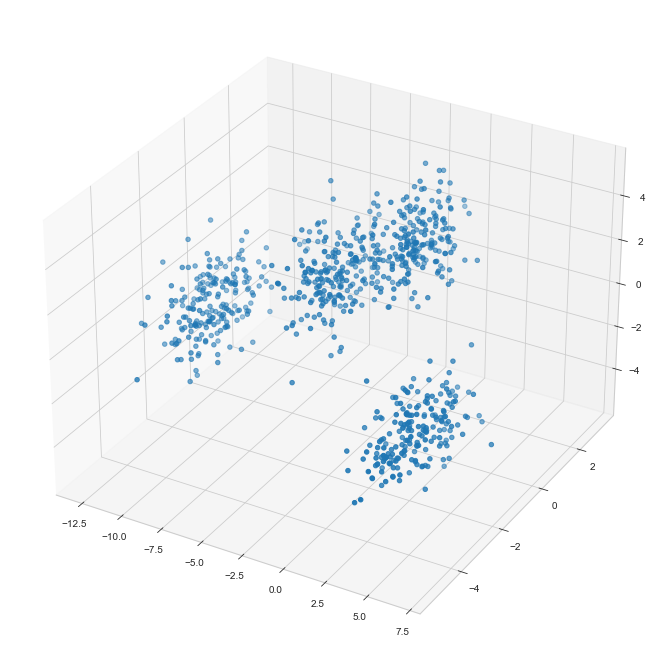

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)  # rc => runtime configuration

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples = 800, n_features = 3, 
                  centers = 4)
print ("X = ",X, X.shape)
# print ("X[:,0] = ",X[:,0])
print ("y = ", y[:50], len(y))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

C = [[ 3.31 -2.42 -2.45]
 [-9.51 -2.08  0.29]
 [-3.45 -0.96  1.97]
 [-0.09  0.27  3.08]]


C:\Users\NEHATH~1\AppData\Local\Temp/ipykernel_4708/4042996405.py:12: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



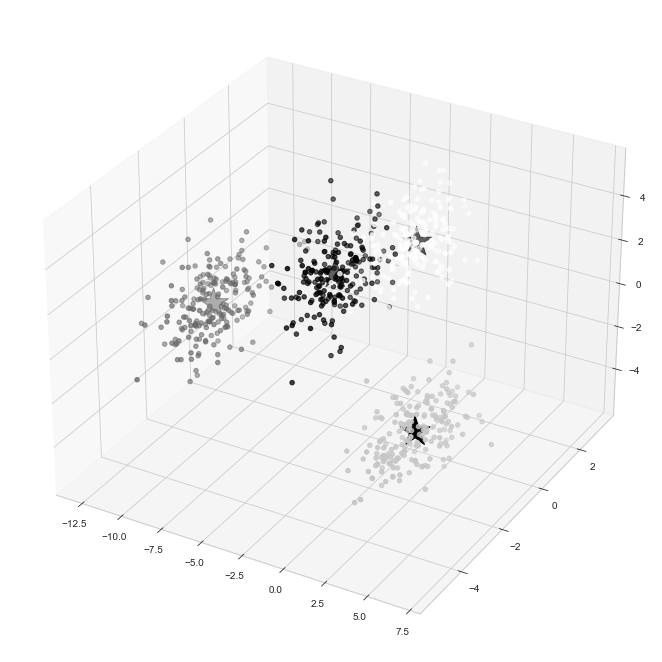

In [59]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print ("C =",C)
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#000000', s=1000)


In [ ]:
#K- MEANS CLUSTERING

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot styling
import seaborn as sns; sns.set()  # for plot styling

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [62]:
dataset = pd.read_csv('unemployment1.csv')

In [63]:
dataset.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [64]:
dataset.shape    # number of rows and columns in the dataframe

(267, 9)

In [65]:
dataset.describe().transpose()    # descriptive statistics of the dataset

count          mean           std  \
 Estimated Unemployment Rate (%)          267.0  1.223693e+01  1.080328e+01   
 Estimated Employed                       267.0  1.396211e+07  1.336632e+07   
 Estimated Labour Participation Rate (%)  267.0  4.168157e+01  7.845419e+00   
longitude                                 267.0  2.282605e+01  6.270731e+00   
latitude                                  267.0  8.053242e+01  5.831738e+00   

                                                  min           25%  \
 Estimated Unemployment Rate (%)               0.5000  4.845000e+00   
 Estimated Employed                       117542.0000  2.838930e+06   
 Estimated Labour Participation Rate (%)      16.7700  3.726500e+01   
longitude                                     10.8505  1.811240e+01   
latitude                                      71.1924  7.608560e+01   

                                                   50%           75%  \
 Estimated Unemployment Rate (%)          9.650000e+00  1.675500e+01   
 Estimated Employed                       9.732417e+06  2.187869e+07   
 Estimated Labour Participation Rate (%)  4.039000e+01  4.405500e+01   
longitude                                 2.361020e+01  2.727840e+01   
latitude                                  7.901930e+01  8.527990e+01   

                                                   max  
 Estimated Unemployment Rate (%)          7.585000e+01  
 Estimated Employed                       5.943376e+07  
 Estimated Labour Participation Rate (%)  6.969000e+01  
longitude                                 3.377820e+01  
latitude                                  9.293760e+01

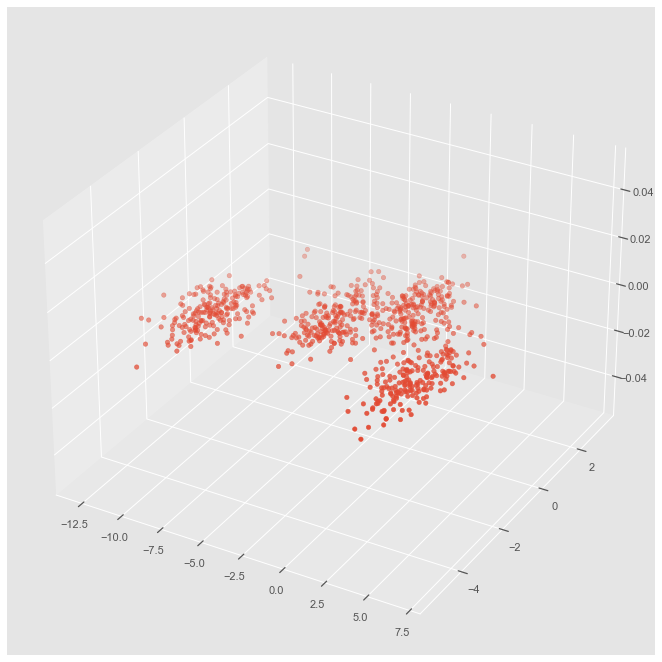

In [66]:
# plot in 3D space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1])


In [67]:
#ELBOW METHOD

[24564.736247381945, 10895.637742421504, 3701.1843284779557, 2299.1093074316595, 2139.8537954348226, 1996.7675889734599, 1858.8452959879648, 1707.4381617329047, 1597.045643997132, 1492.115329757976]


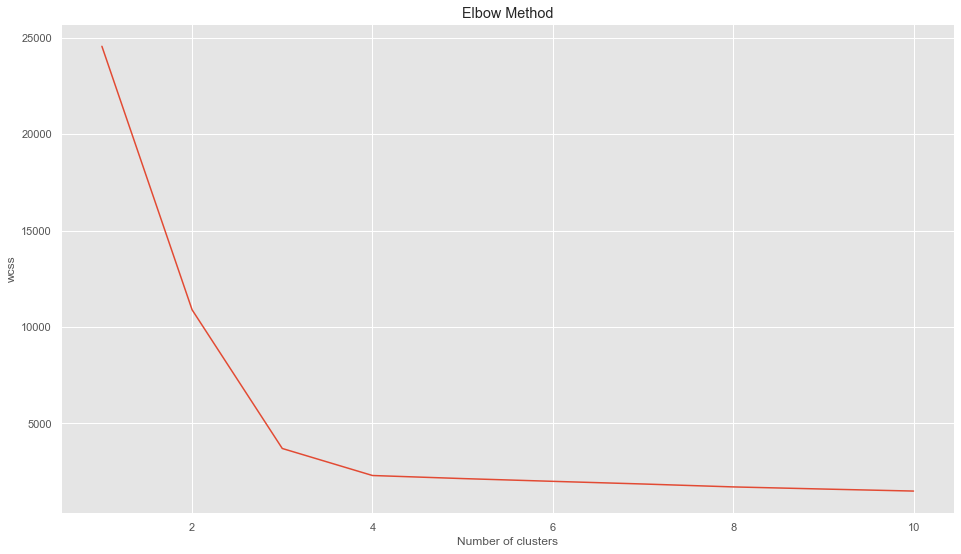

In [68]:
# Using the elbow method to find the ideal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
print (wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [69]:
# Calculating the silhoutte coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters = n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric = 'euclidean')
    print("For n_clusters = {}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))


For n_clusters = 2, The Silhouette Coefficient is 0.5034317639708007
For n_clusters = 3, The Silhouette Coefficient is 0.6213649541241991
For n_clusters = 4, The Silhouette Coefficient is 0.5680968275330226
For n_clusters = 5, The Silhouette Coefficient is 0.4993249212289119
For n_clusters = 6, The Silhouette Coefficient is 0.40127856782643045
For n_clusters = 7, The Silhouette Coefficient is 0.2925261858162034
For n_clusters = 8, The Silhouette Coefficient is 0.24372980014913204
For n_clusters = 9, The Silhouette Coefficient is 0.24352553636401042
For n_clusters = 10, The Silhouette Coefficient is 0.25425103878386096


In [70]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters = i) for i in Nc]
kmeans


[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

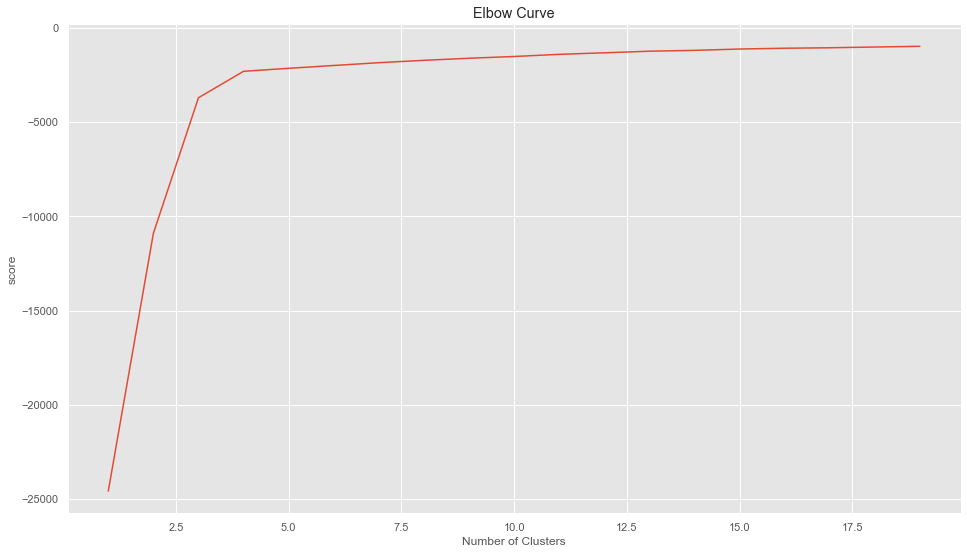

[-24564.736247381952, -10895.637742421506, -3701.1843284779557, -2299.1093074316595, -2139.6775685841244, -1990.5397474783847, -1841.5345600562457, -1716.9305493355537, -1606.2568342714421, -1512.7782198157884, -1399.5472305745177, -1317.6552455325823, -1232.776826238258, -1187.7095767061978, -1117.3066048782507, -1074.956277472262, -1050.498025738911, -1010.1641878752674, -972.5180370097779]


In [71]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
pl.plot(Nc, score)
pl.xlabel('Number of Clusters')
pl.ylabel('score')
pl.title('Elbow Curve')
pl.show()

print(score)


In [72]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:", k, "cost:", interia, "labels :", labels[:20])
print()

k: 1 cost: 24564.736247381945 labels : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
k: 2 cost: 10895.637742421504 labels : [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
k: 3 cost: 3701.1843284779557 labels : [2 2 0 2 2 2 0 2 0 2 0 1 2 1 2 2 0 0 1 0]
k: 4 cost: 2299.1093074316595 labels : [0 0 3 0 0 0 3 0 2 0 2 1 0 1 0 0 2 2 1 3]
k: 5 cost: 2139.8537954348226 labels : [1 1 0 1 1 1 0 1 4 1 3 2 1 2 1 1 3 3 2 0]
k: 6 cost: 1990.92419734404 labels : [2 2 3 2 2 2 3 2 0 2 5 4 2 1 2 2 5 5 4 3]
k: 7 cost: 1845.7465389133115 labels : [1 1 0 4 4 1 0 4 6 4 3 5 1 5 1 4 3 3 2 0]
k: 8 cost: 1699.2788534260644 labels : [0 0 4 0 7 0 1 7 3 7 6 2 0 5 0 7 6 6 2 4]
k: 9 cost: 1603.2125693798769 labels : [7 7 1 3 3 7 8 3 5 3 4 6 3 2 7 3 4 4 6 1]
k: 10 cost: 1494.0631413932497 labels : [7 7 1 3 3 7 8 3 5 3 4 6 3 9 7 3 4 4 2 1]



[ 0  1  0  1  2  1  1 -1  1  1  0  2  1  0  2  1  1  0  1  2] 1000 4
Number of clusters: 3


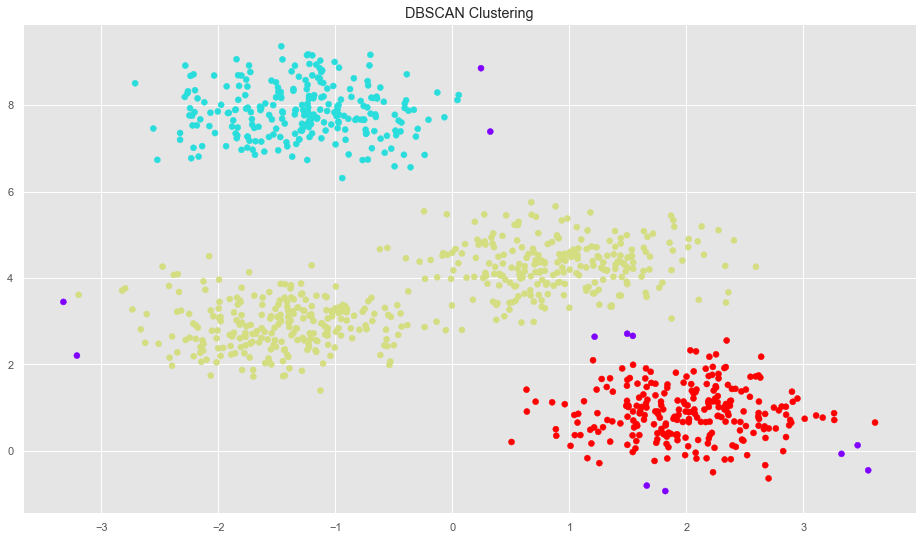

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate random data points
X, _ = make_blobs(n_samples = 1000, centers = 4, cluster_std = 0.6, random_state = 0)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
dbscan.fit(X)

# Get the labels and number of clusters
labels = dbscan.labels_
print (labels[:20], len(labels), len(set(labels)))
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters:', n_clusters)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c = labels, cmap = 'rainbow')
plt.title('DBSCAN Clustering')
plt.show()